In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
limpios = pd.read_csv(r'C:\Users\Sengan\Desktop\prestamo acciones\Proyecto-ML\processed\processed.csv')

In [4]:
limpios.head()

,Share pledge ratio of controlling shareholders,Pledge ratio of unlimited shares,audit opinion,Downgrade or negative,Ratio of other receivables to total assets,ROA,Asset liability ratio (total liabilities - contract liabilities - advance receipts)/(total assets - goodwill - contract liabilities - advance receipts),Pledge ratio of limited sale shares,ROE,Enterprise age,IsDefault
0,0.152395,0.126366,0.0,0.0,0.013032,0.046191,0.632901,0.000000,0.129841,11.258333,0
1,0.608351,0.159443,0.0,0.0,0.013802,0.121959,0.654380,0.014874,0.190550,9.166667,0
2,0.499388,0.153660,0.0,0.0,0.005863,0.015570,0.315073,0.000000,0.034949,10.175000,0
3,0.000000,0.001285,0.0,0.0,0.030776,0.164398,0.490227,0.000000,0.295278,16.494444,0
4,0.332566,0.014730,0.0,0.0,0.021106,0.229710,0.555522,0.232977,0.598016,9.391667,0


In [5]:
limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                   --------------  -----  
 0   Share pledge ratio of controlling shareholders                                                                                                           1435 non-null   float64
 1   Pledge ratio of unlimited shares                                                                                                                         1435 non-null   float64
 2   audit opinion                                                                                                                                            1435 no

In [6]:
limpios.describe()

,Share pledge ratio of controlling shareholders,Pledge ratio of unlimited shares,audit opinion,Downgrade or negative,Ratio of other receivables to total assets,ROA,Asset liability ratio (total liabilities - contract liabilities - advance receipts)/(total assets - goodwill - contract liabilities - advance receipts),Pledge ratio of limited sale shares,ROE,Enterprise age,IsDefault
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.440492,0.108032,0.078746,0.018815,0.019935,0.054723,0.438565,0.024034,0.048677,9.836481,0.180488
std,0.344470,0.133721,0.360247,0.135920,0.036553,0.099951,0.215517,0.080303,0.291947,9.266917,0.384727
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.646738,0.010000,0.000000,-6.440000,0.000000,0.000000
25%,0.096166,0.000000,0.000000,0.000000,0.004045,0.026190,0.269863,0.000000,0.025792,4.043056,0.000000
50%,0.434688,0.054170,0.000000,0.000000,0.009005,0.053641,0.434211,0.000000,0.073784,7.600000,0.000000
75%,0.730736,0.185471,0.000000,0.000000,0.020160,0.094006,0.573491,0.000000,0.133751,13.497222,0.000000
max,1.000000,0.706297,2.000000,1.000000,0.418566,0.695737,1.740000,0.759900,1.880000,121.002778,1.000000


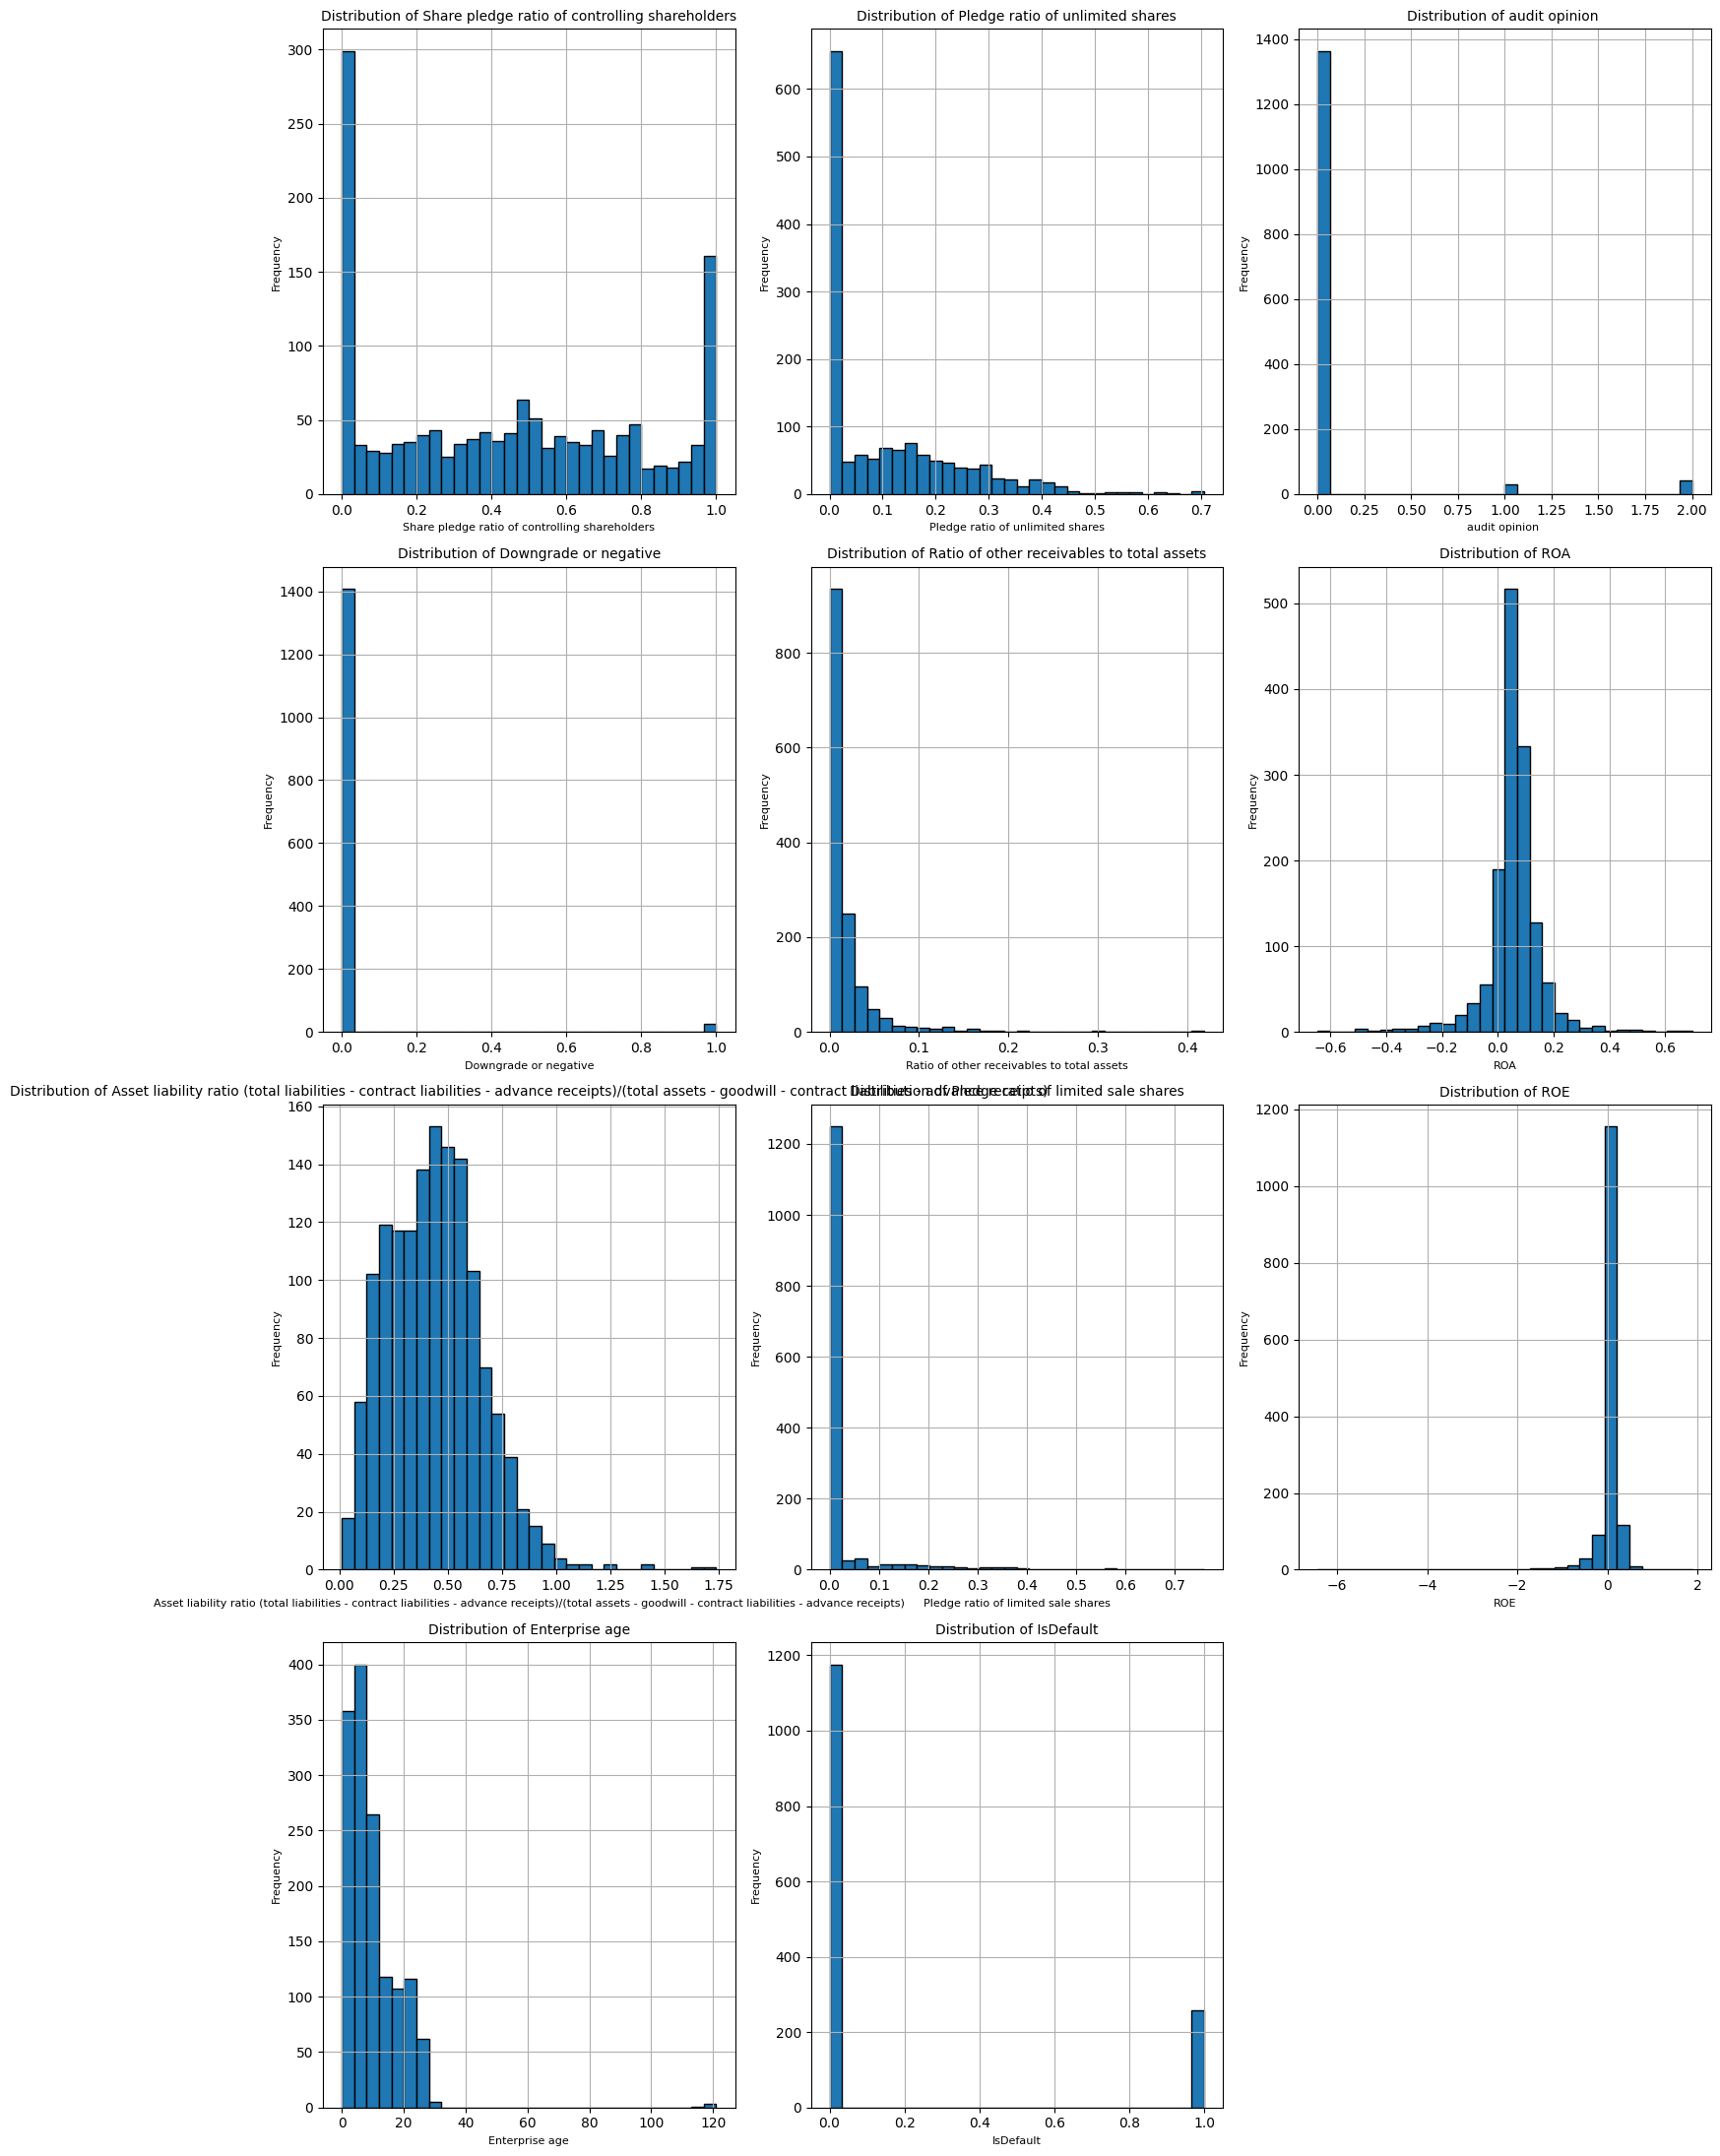

In [7]:
num_columns = limpios.select_dtypes(include="number").columns  # Seleccionar columnas numéricas
num_vars = len(num_columns)

plt.figure(figsize=(15, num_vars * 2))

for i, column in enumerate(num_columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)  # Organizar gráficos en filas de 3
    limpios[column].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\Sengan\AppData\Local\Temp\ipykernel_2360\2185237234.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


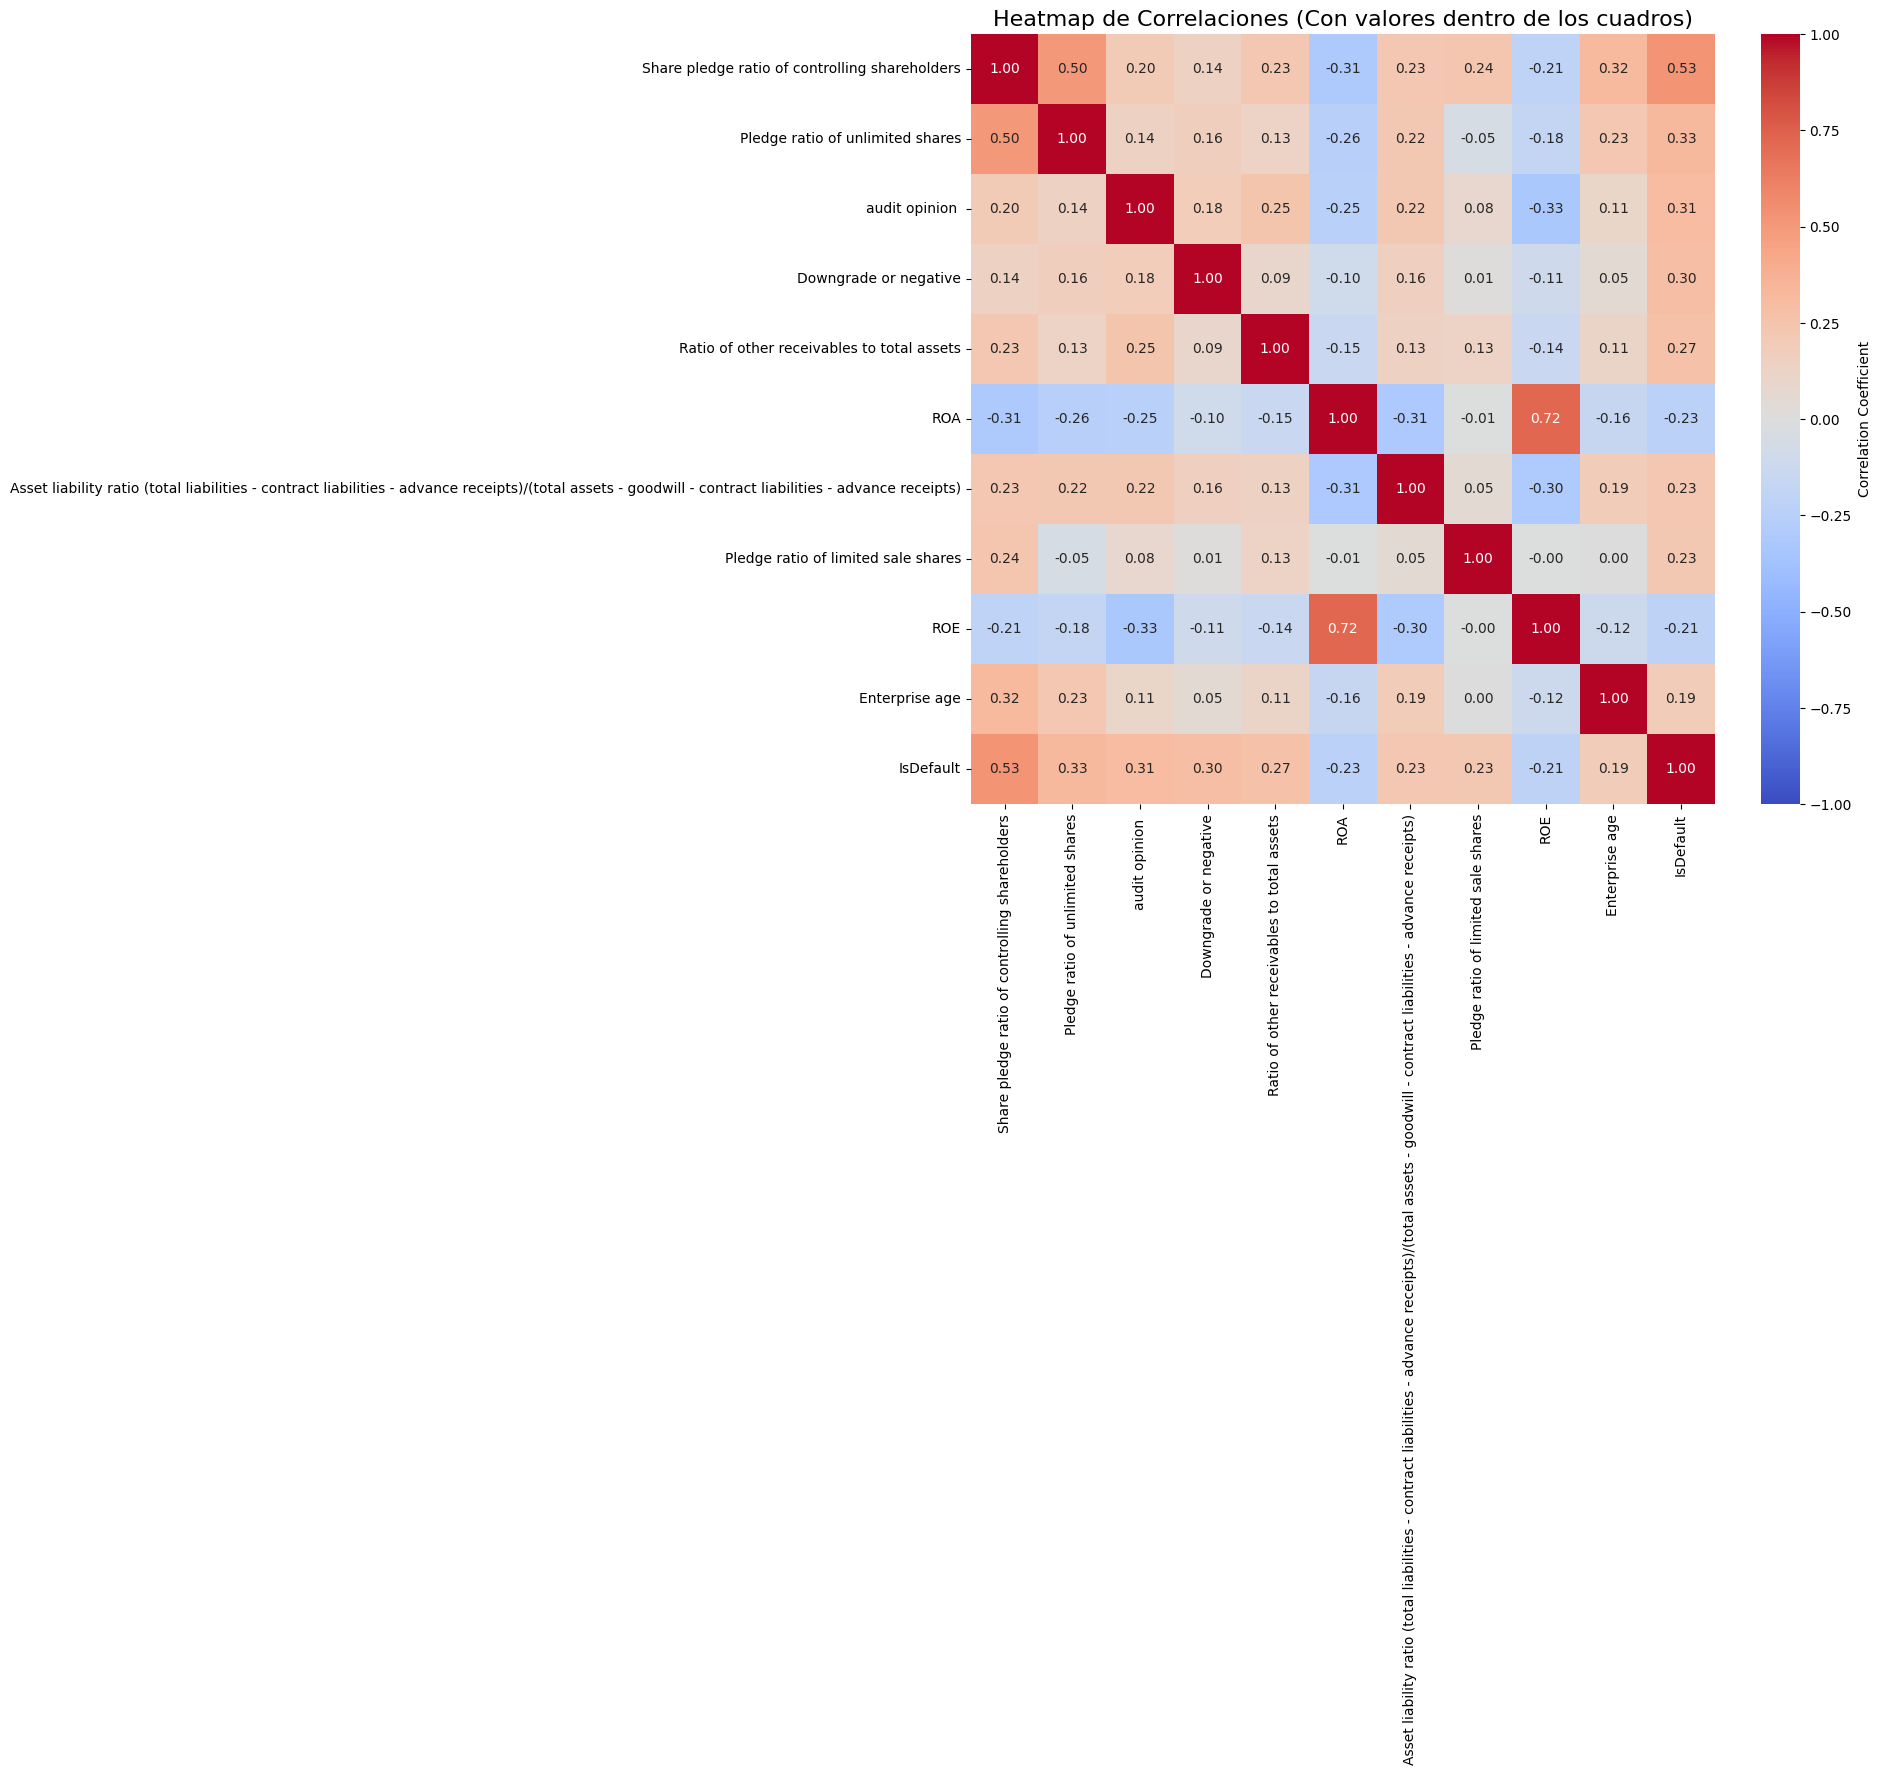

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(limpios.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap de Correlaciones (Con valores dentro de los cuadros)", fontsize=16)
plt.tight_layout()
plt.show()

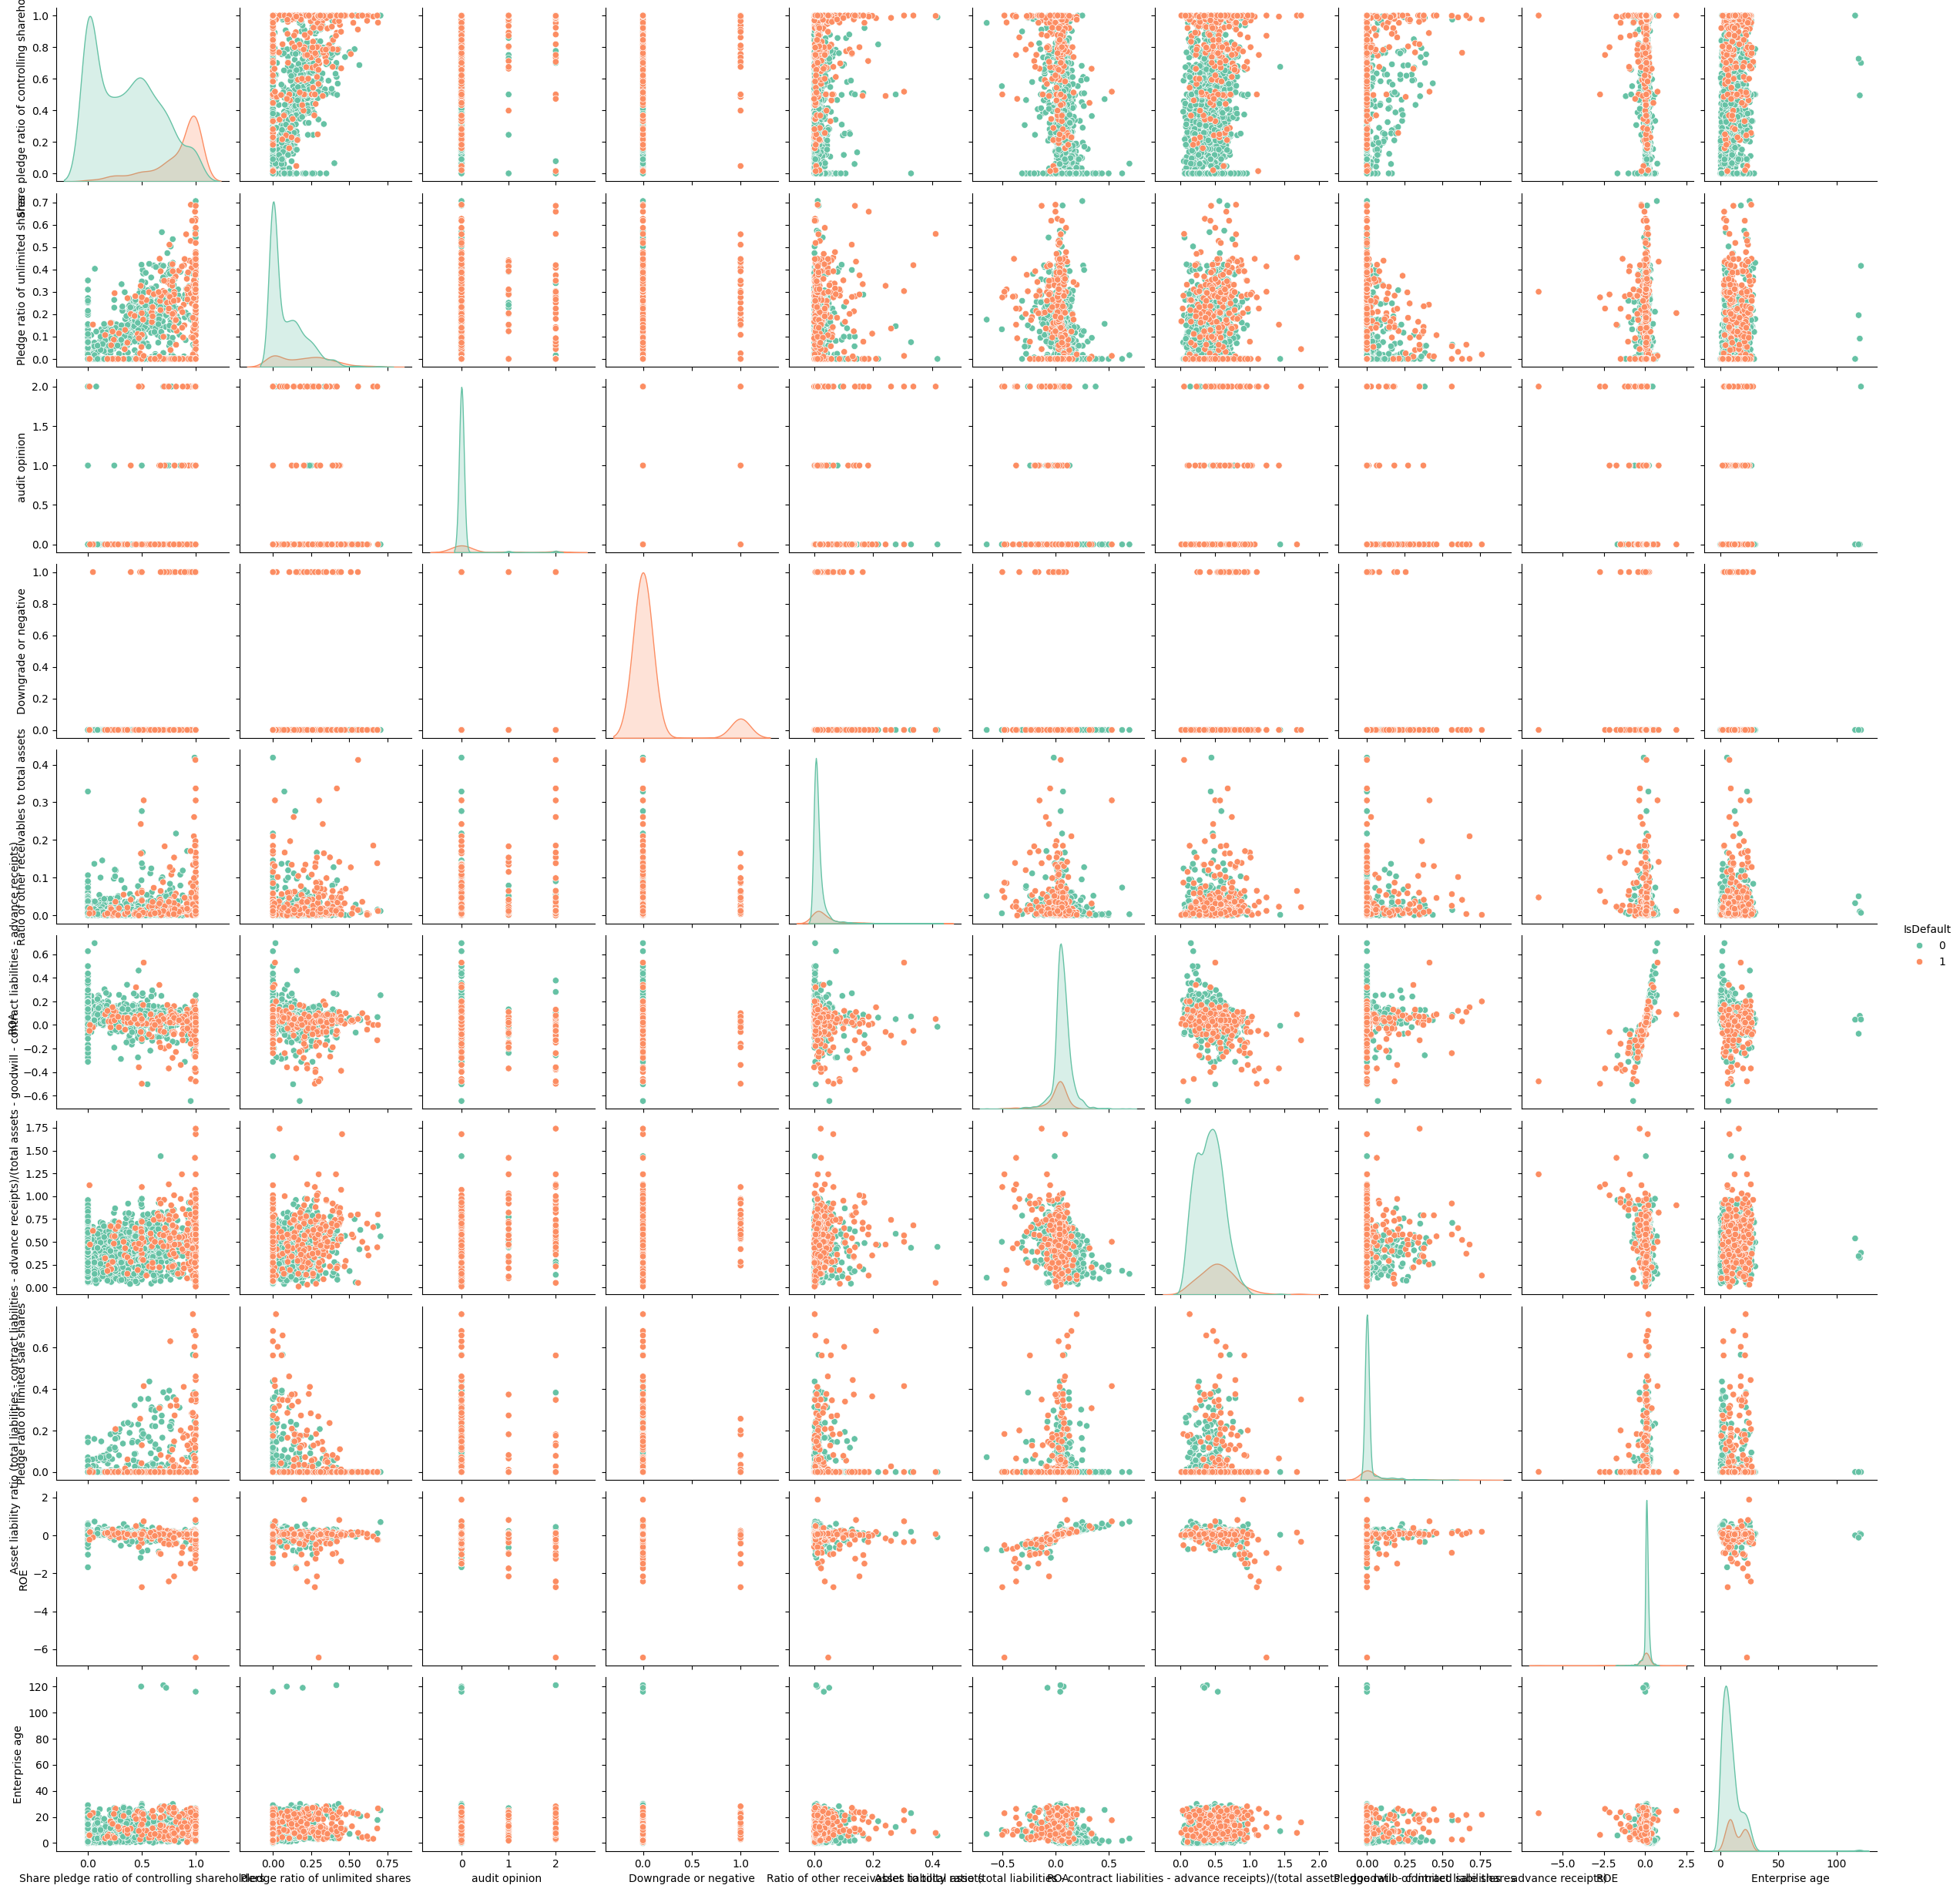

In [9]:
numeric_columns = limpios.select_dtypes(include="number").columns
pairplot_data = limpios[numeric_columns]

# Crear pairplot asegurando que 'IsDefault' sea tratada como categórica
if "IsDefault" in pairplot_data.columns:
    pairplot_data["IsDefault"] = pairplot_data["IsDefault"].astype(str)  # Convertir a string para usar como 'hue'
    sns.pairplot(pairplot_data, hue="IsDefault", diag_kind="kde", height=2.5, palette="Set2")
    plt.show()
else:
    print("La columna 'IsDefault' no está presente o no es compatible para el hue.")